In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy import linalg as LA
from scipy.linalg import circulant

# HW 4 - Implementation

## a)

In [2]:
c= 0.6 #givven in the pdf
N= 64 #givven in the pdf

In [3]:
# class for a clean signal, defined in Q3
class cleanSignal: 
    def __init__(self, N_param, c_param):   
        self.N = N_param
        self.c = c_param
        mu_M, sigma_M = 0, math.sqrt(self.c) # mean and standard deviation
        mu_L, sigma_L = 0, math.sqrt((self.N/2)*(1-self.c)) # mean and standard deviation
        low_K, high_K = 0, self.N/2-1 # mean and standard deviation
        K = np.random.randint(low_K,high_K)
        M = np.random.normal(mu_M, sigma_M)
        L= np.random.normal(mu_L, sigma_L)
        self.vec_clean = np.zeros(N)
        for entry in range(self.N):
            if entry == K or entry == K+self.N/2:
                self.vec_clean[entry] = M+L
            else:
                self.vec_clean[entry] = M
        
      

In [4]:
# creating clean signals as a matrix, each column is a realization of random signal
def sampleCleanSignals(sample_num):
    vec_clean_matrix = np.zeros((N,sample_num))
    for vec_num in range(sample_num):
        clean = cleanSignal(N,c)
        vec_clean_matrix[:,vec_num] = clean.vec_clean
    return vec_clean_matrix

In [5]:
#calculates empirical approximation of the mean signal for sample_num realization of the sigmnal
def meanMSE(sample_num,max_sample_num):
    realization_matrix = sampleCleanSignals(sample_num)
    empirical_mean = realization_matrix.mean()
    if sample_num == max_sample_num:
        print('For',max_sample_num, 'realization, The mean is:, ',empirical_mean)
    return np.square(np.subtract(0,empirical_mean)).mean()

For 1000 realization, The mean is:,  0.006702147539150054


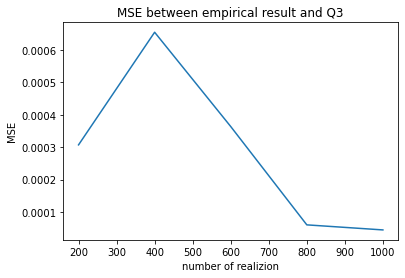

In [7]:
sample_num = 1000
sample_num_lst = range(200, sample_num+1, 200)
mean_mse_lst = [meanMSE(it,sample_num) for it in sample_num_lst]
plt.figure()
plt.plot(sample_num_lst, mean_mse_lst)
plt.title('MSE between empirical result and Q3')
plt.xlabel('number of realizion')
plt.ylabel('MSE')
plt.show()

In [8]:
#building H as in Q4
circular_col_lst = [1]
c_times = round(N/2-1)
circular_col_lst.extend([c for i in range(c_times)])
circular_col_lst.append(1)
circular_col_lst.extend([c for i in range(c_times)])
q3_mat = circulant(circular_col_lst)

In [9]:
#calculates empirical approximation of the autocorrelation matrix for sample_num realization of the sigmnal
def autocorMSE(sample_num,max_sample_num):
    auto_cor_matrix = np.zeros((N,N))
    vec = np.zeros(N)
    for vec_num in range(sample_num):
        clean = cleanSignal(N,c)
        temp = np.matmul(clean.vec_clean.reshape((N,1)),clean.vec_clean.reshape((1,N)))
        auto_cor_matrix += temp   
    auto_cor_matrix = auto_cor_matrix / sample_num
    
    if sample_num == max_sample_num:
        auto_core_last = auto_cor_matrix
       
    return np.square(np.subtract(q3_mat,auto_cor_matrix)).mean(), auto_cor_matrix


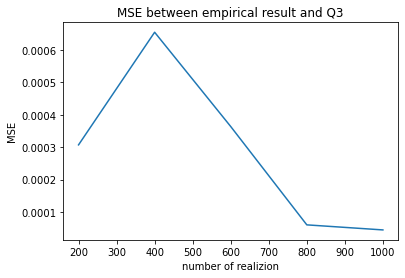

Number of samples:  1000
Mse between empirical result and class result ( autocorrelation matrix): 0.005566833083745853


In [10]:
sample_num_lst = range(200, sample_num+1, 200)
autocor_mse_lst = [autocorMSE(it,sample_num)[0] for it in sample_num_lst]
plt.figure()
plt.plot(sample_num_lst, mean_mse_lst)
plt.title('MSE between empirical result and Q3')
plt.xlabel('number of realizion')
plt.ylabel('MSE')
plt.show()
auto_cor_mat = autocorMSE(sample_num,sample_num)[1]
print('Number of samples: ',sample_num)
print('Mse between empirical result and class result ( autocorrelation matrix):',np.square(np.subtract(q3_mat,auto_cor_mat)).mean())

In [11]:
auto_pd = pd.DataFrame(auto_cor_mat)
auto_pd

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.214276,0.673538,0.670283,0.674988,0.673523,0.657367,0.673394,0.649244,0.672237,0.672270,...,0.650528,0.684706,0.663228,0.682508,0.675336,0.651570,0.680049,0.682633,0.661206,0.669634
1,0.673538,0.860908,0.673302,0.678007,0.676542,0.660386,0.676413,0.652263,0.675256,0.675288,...,0.653547,0.687725,0.666247,0.685527,0.678355,0.654589,0.683068,0.685652,0.664225,0.672653
2,0.670283,0.673302,0.949909,0.674752,0.673288,0.657132,0.673158,0.649009,0.672001,0.672034,...,0.650292,0.684470,0.662992,0.682272,0.675101,0.651334,0.679813,0.682398,0.660970,0.669398
3,0.674988,0.678007,0.674752,1.089663,0.677992,0.661836,0.677862,0.653713,0.676706,0.676738,...,0.654997,0.689174,0.667697,0.686977,0.679805,0.656039,0.684518,0.687102,0.665675,0.674103
4,0.673523,0.676542,0.673288,0.677992,1.162558,0.660371,0.676398,0.652249,0.675241,0.675274,...,0.653532,0.687710,0.666232,0.685512,0.678341,0.654574,0.683053,0.685638,0.664210,0.672638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.651570,0.654589,0.651334,0.656039,0.654574,0.638418,0.654444,0.630295,0.653288,0.653320,...,0.631579,0.665756,0.644278,0.663559,0.656387,1.086687,0.661100,0.663684,0.642257,0.650685
60,0.680049,0.683068,0.679813,0.684518,0.683053,0.666897,0.682923,0.658774,0.681767,0.681799,...,0.660058,0.694235,0.672757,0.692038,0.684866,0.661100,1.117094,0.692163,0.670736,0.679164
61,0.682633,0.685652,0.682398,0.687102,0.685638,0.669482,0.685508,0.661359,0.684351,0.684384,...,0.662642,0.696820,0.675342,0.694622,0.687451,0.663684,0.692163,1.125897,0.673320,0.681748
62,0.661206,0.664225,0.660970,0.665675,0.664210,0.648054,0.664080,0.639931,0.662923,0.662956,...,0.641215,0.675392,0.653914,0.673194,0.666023,0.642257,0.670736,0.673320,1.041756,0.660321


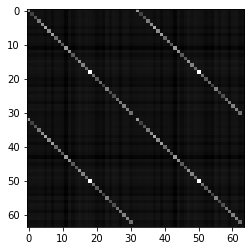

In [12]:
plt.imshow(auto_cor_mat, cmap='gray')

## b)

In [13]:
# calculates MSE between original 256*256 img and comp img
def findMSE(orig , comp):
    return np.square(np.subtract(orig,comp)).mean()

In [14]:
# building the Wiener filter
def buildWienerFilter(H_mat, auto_cor_mat, sigma):
    inverse_helper = np.matmul(H_mat,auto_cor_mat)
    inverse_helper = np.matmul(inverse_helper,np.transpose(H_mat))
    inverse_helper = inverse_helper + (sigma**2)*np.identity(N)
    inverse_helper = LA.inv(inverse_helper)
    W_firstComponent = np.matmul(auto_cor_mat,np.transpose(H_mat)) 
    W = np.matmul(W_firstComponent,inverse_helper)
    return W
    

In [15]:
# adding the noise with standard deviation sigma
def addNoise(vec_clean, sigma, sample_num, H_mat=None):
    vec_noisy_matrix= np.zeros((N,sample_num))
    for vec_num in range(sample_num):
        noise = np.random.normal(0,sigma,N)
        if H_mat is not None:
            vec_noisy_matrix[:,vec_num] = np.matmul(H_mat,vec_clean[:,vec_num]) + noise
        else:
            vec_noisy_matrix[:,vec_num] = vec_clean[:,vec_num] + noise
    return vec_noisy_matrix

In [16]:
# denosing signals by W
def denosingSignalsByWiener(W, sample_num, vec_clean, vec_noisy):
    denoise_signal_lst=[]
    empirical_denoise_mse_lst = []
    # denosing signal by W
    for vec_num in range(sample_num):
        denoise_vec = np.matmul(W,vec_noisy[:,vec_num])
        denoise_signal_lst.append(denoise_vec)
        mse = findMSE(vec_clean[:,vec_num],denoise_vec)
        empirical_denoise_mse_lst.append(mse)
    return denoise_signal_lst, empirical_denoise_mse_lst

In [17]:
#display few realization of the vector and Wiener filter operator
def displayResults(vec_clean, vec_noisy,denoise_lst):
    entries_num=range(N)
    fig,axes=plt.subplots(nrows=3, ncols=2,figsize=(50,15))    
    i = 0
    for row in axes:
        for col in row:
            col.plot(entries_num, vec_clean[:,i], label = 'clean')
            col.plot(entries_num, vec_noisy[:,i], label = 'noisy')
            col.plot(entries_num, denoise_lst[i], label = 'denoise')
            col.legend()
            i+=1

In [18]:
#display the avarge MSE
def displayAvargeMSE(sample_num, mse_lst):
    vec_num_arr = range(sample_num)
    plt.figure()
    plt.plot(vec_num_arr, mse_lst)
    plt.title('MSE after denoising by Wiener filter')
    plt.xlabel('vec number')
    plt.ylabel('MSE')
    plt.show()
    print('The avarage MSE is: ', sum(mse_lst)/len(mse_lst))

W = R_signal * H_tanspose(H * R_signal * H_tanspose + sigma_squere * I )^-1,

In this section H = I , R is the autocorrletion matrix, so,

W = R_signal(R_signal + sigma_squere * I )^-1

In [19]:
# doing all the plotting asked in section b,c,d
def experiment(sample_num, H_mat, noise_standard_deviation):
    sigma = noise_standard_deviation
    W = buildWienerFilter(H_mat, auto_cor_mat, sigma)
    plt.imshow(W, cmap='gray')
    # creating clean signals 
    vec_clean = sampleCleanSignals(sample_num)
    # creating noisy signals 
    vec_noisy = addNoise(vec_clean, sigma, sample_num, H_mat)
    #denoising
    denoise_lst, mse_lst = denosingSignalsByWiener(W, sample_num, vec_clean, vec_noisy)
    print('Plotting wiener filter as image')
    print('and plotting several examples of denoised signals')
    print('with respect to their clean and noisy versions')
    displayResults(vec_clean, vec_noisy, denoise_lst)
    displayAvargeMSE(sample_num, mse_lst)

Plotting wiener filter as image
and plotting several examples of denoised signals
with respect to their clean and noisy versions


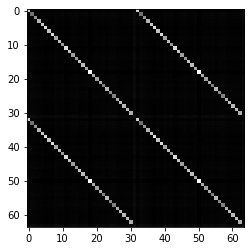

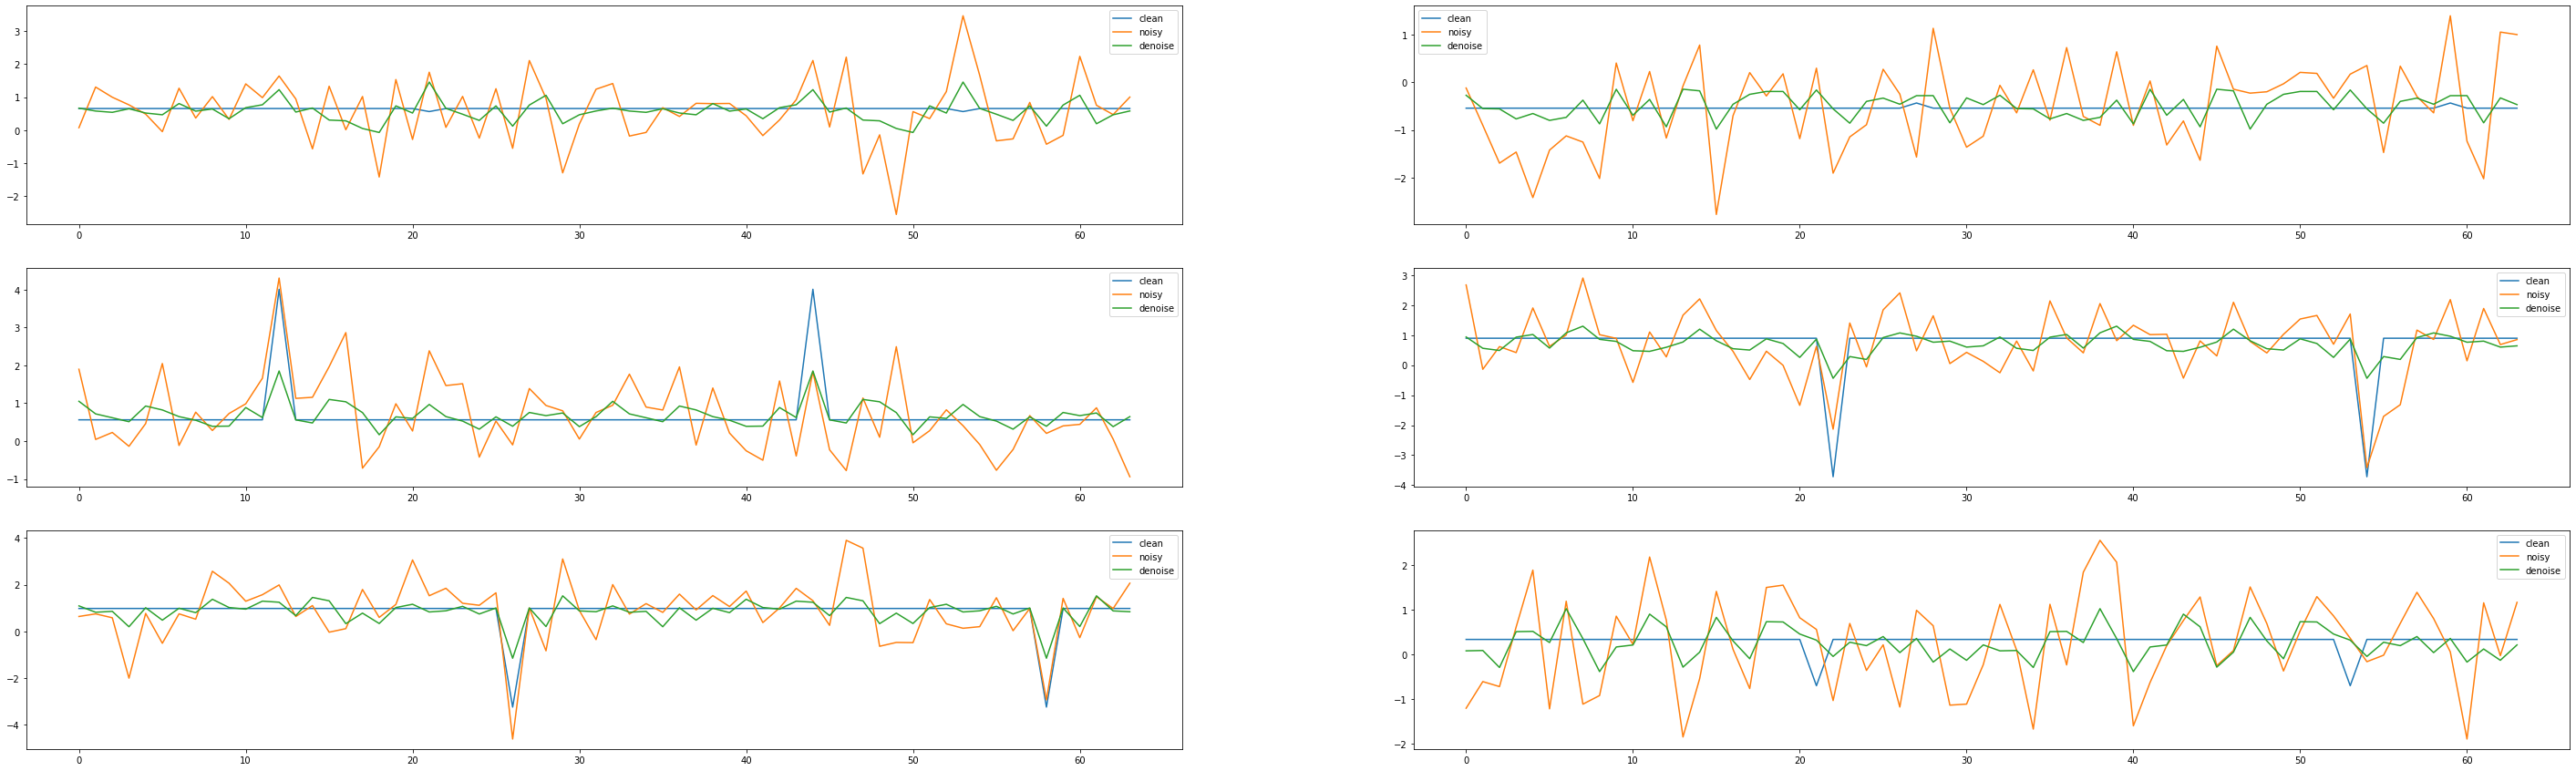

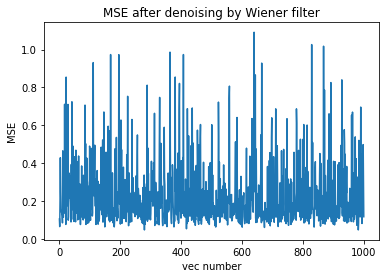

The avarage MSE is:  0.23337974875842696


In [20]:
# section b
experiment(sample_num, np.identity(N), 1)

## c)

In [21]:
#building H as in Q4
circular_colunm_lst = [-5/2,4/3,-1/12]
circular_colunm_lst.extend([0 for i in range(N-5)])
circular_colunm_lst.extend([-1/12,4/3])
H = circulant(circular_colunm_lst)


W = R_signal * H_tanspose(H * R_signal * H_tanspose + sigma_squere * I )^-1

Plotting wiener filter as image
and plotting several examples of denoised signals
with respect to their clean and noisy versions


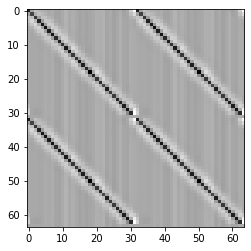

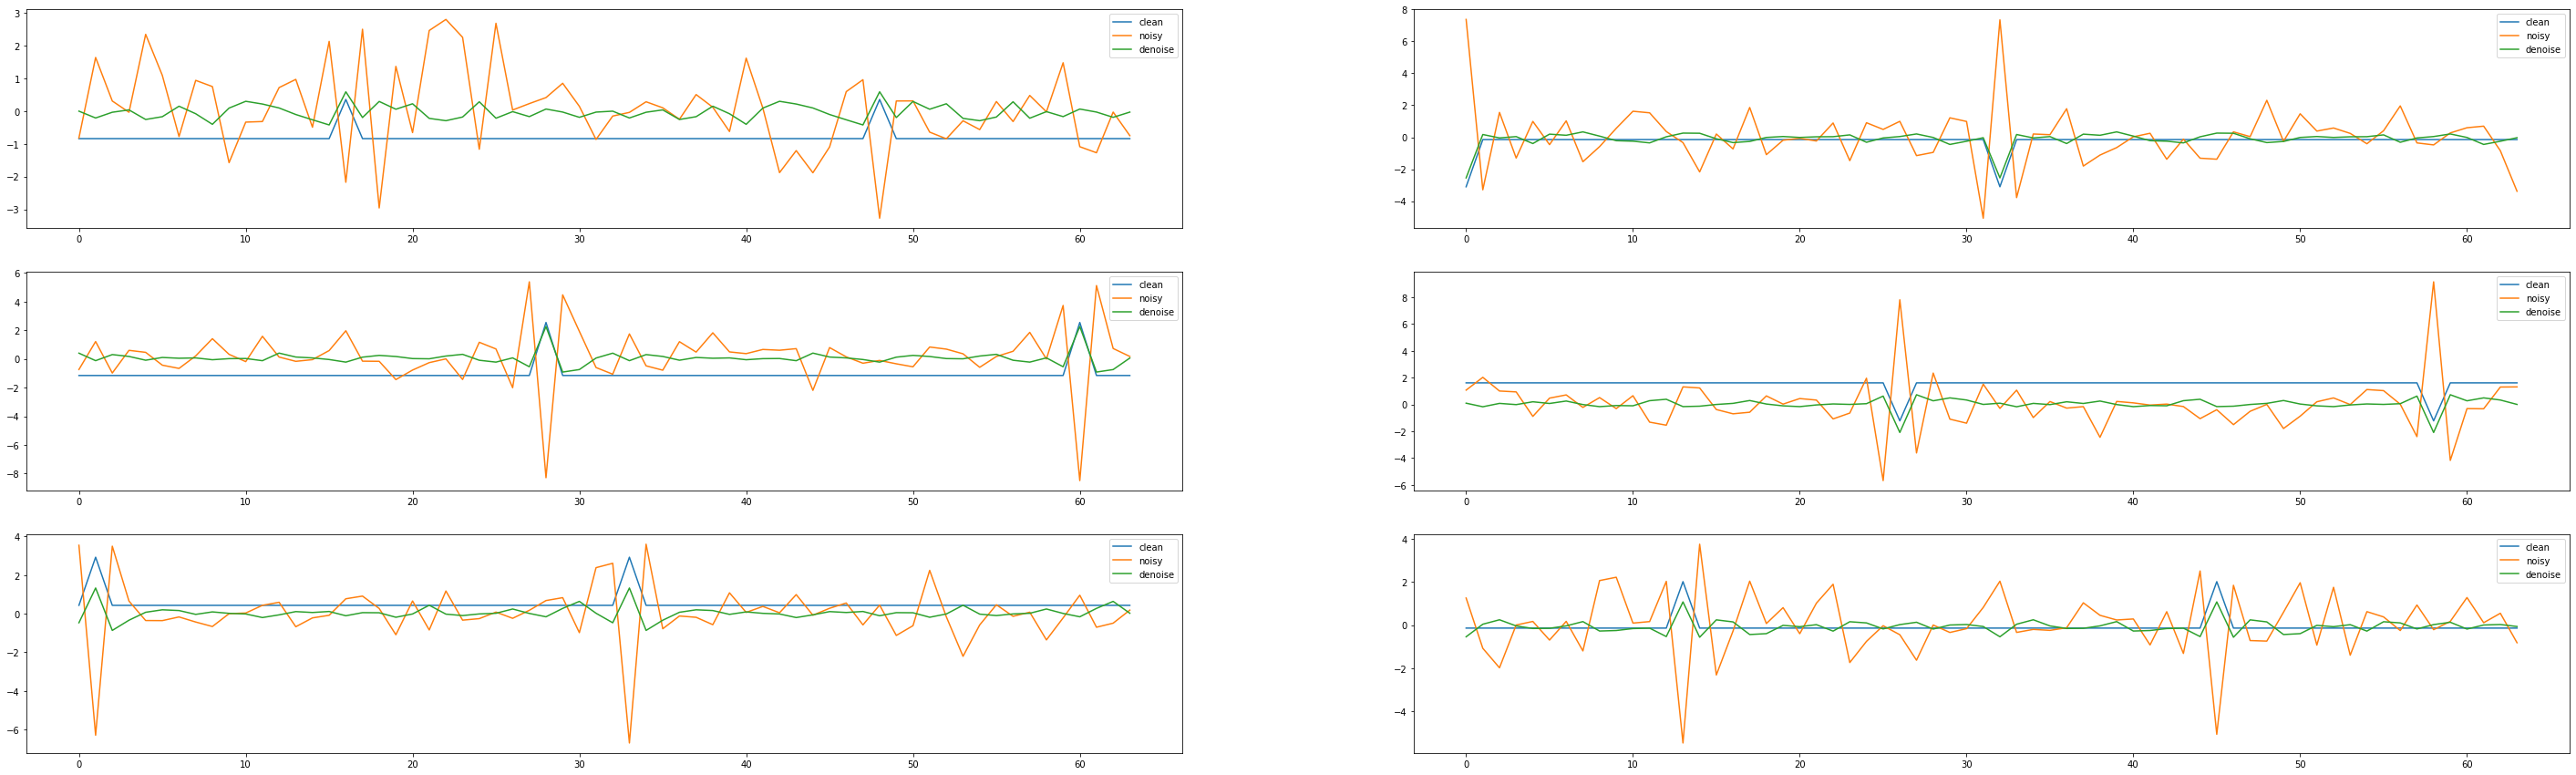

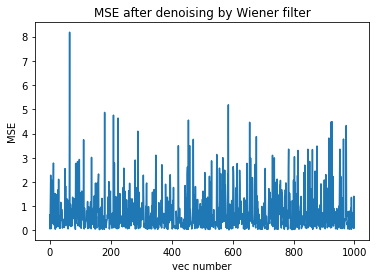

The avarage MSE is:  0.7443606939877999


In [23]:
# section c
experiment(sample_num, H, 1)

## d)

Plotting wiener filter as image
and plotting several examples of denoised signals
with respect to their clean and noisy versions


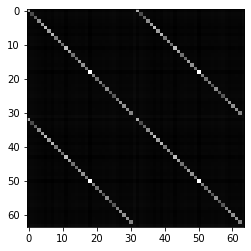

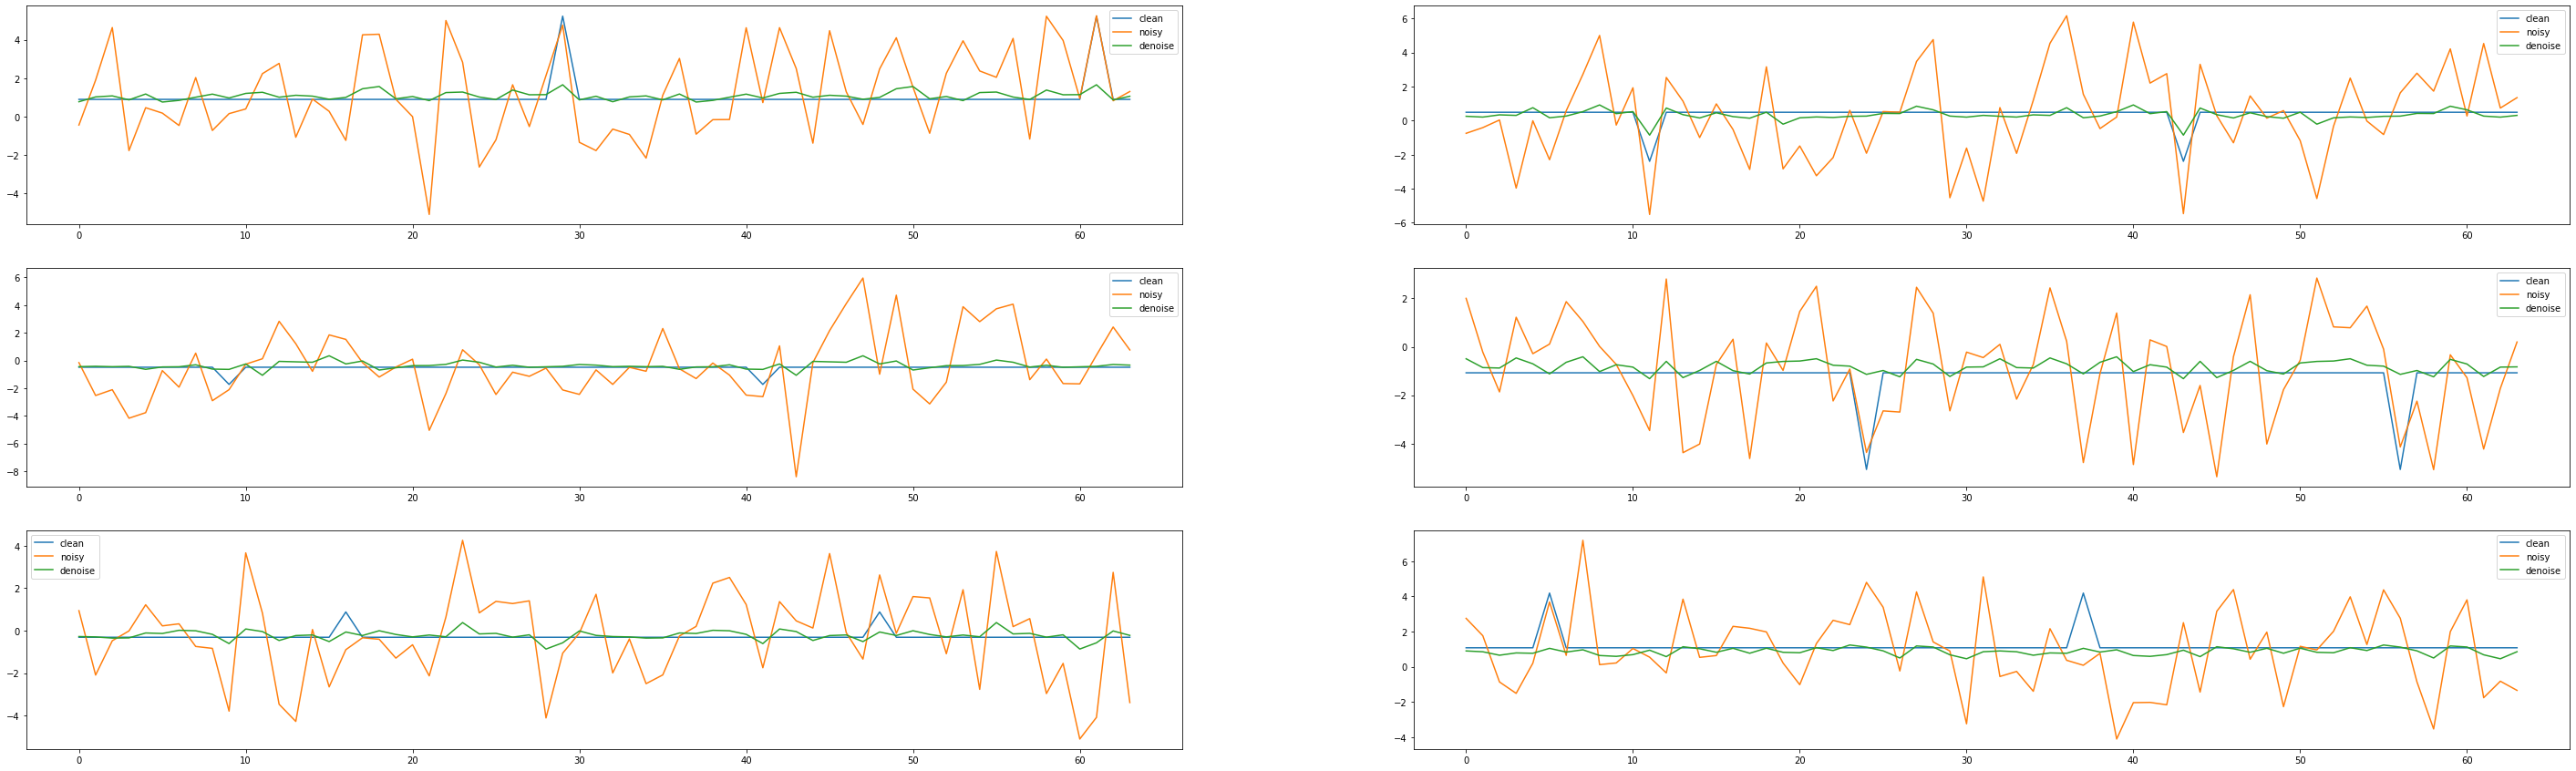

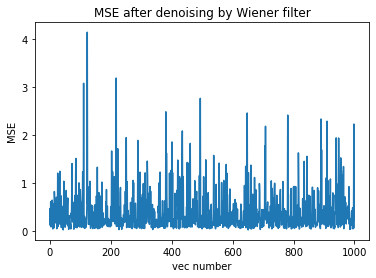

The avarage MSE is:  0.3943405462119404


In [25]:
# section d repeat b
experiment(sample_num, np.identity(N), math.sqrt(5))

Plotting wiener filter as image
and plotting several examples of denoised signals
with respect to their clean and noisy versions


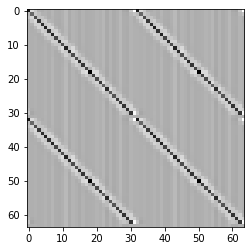

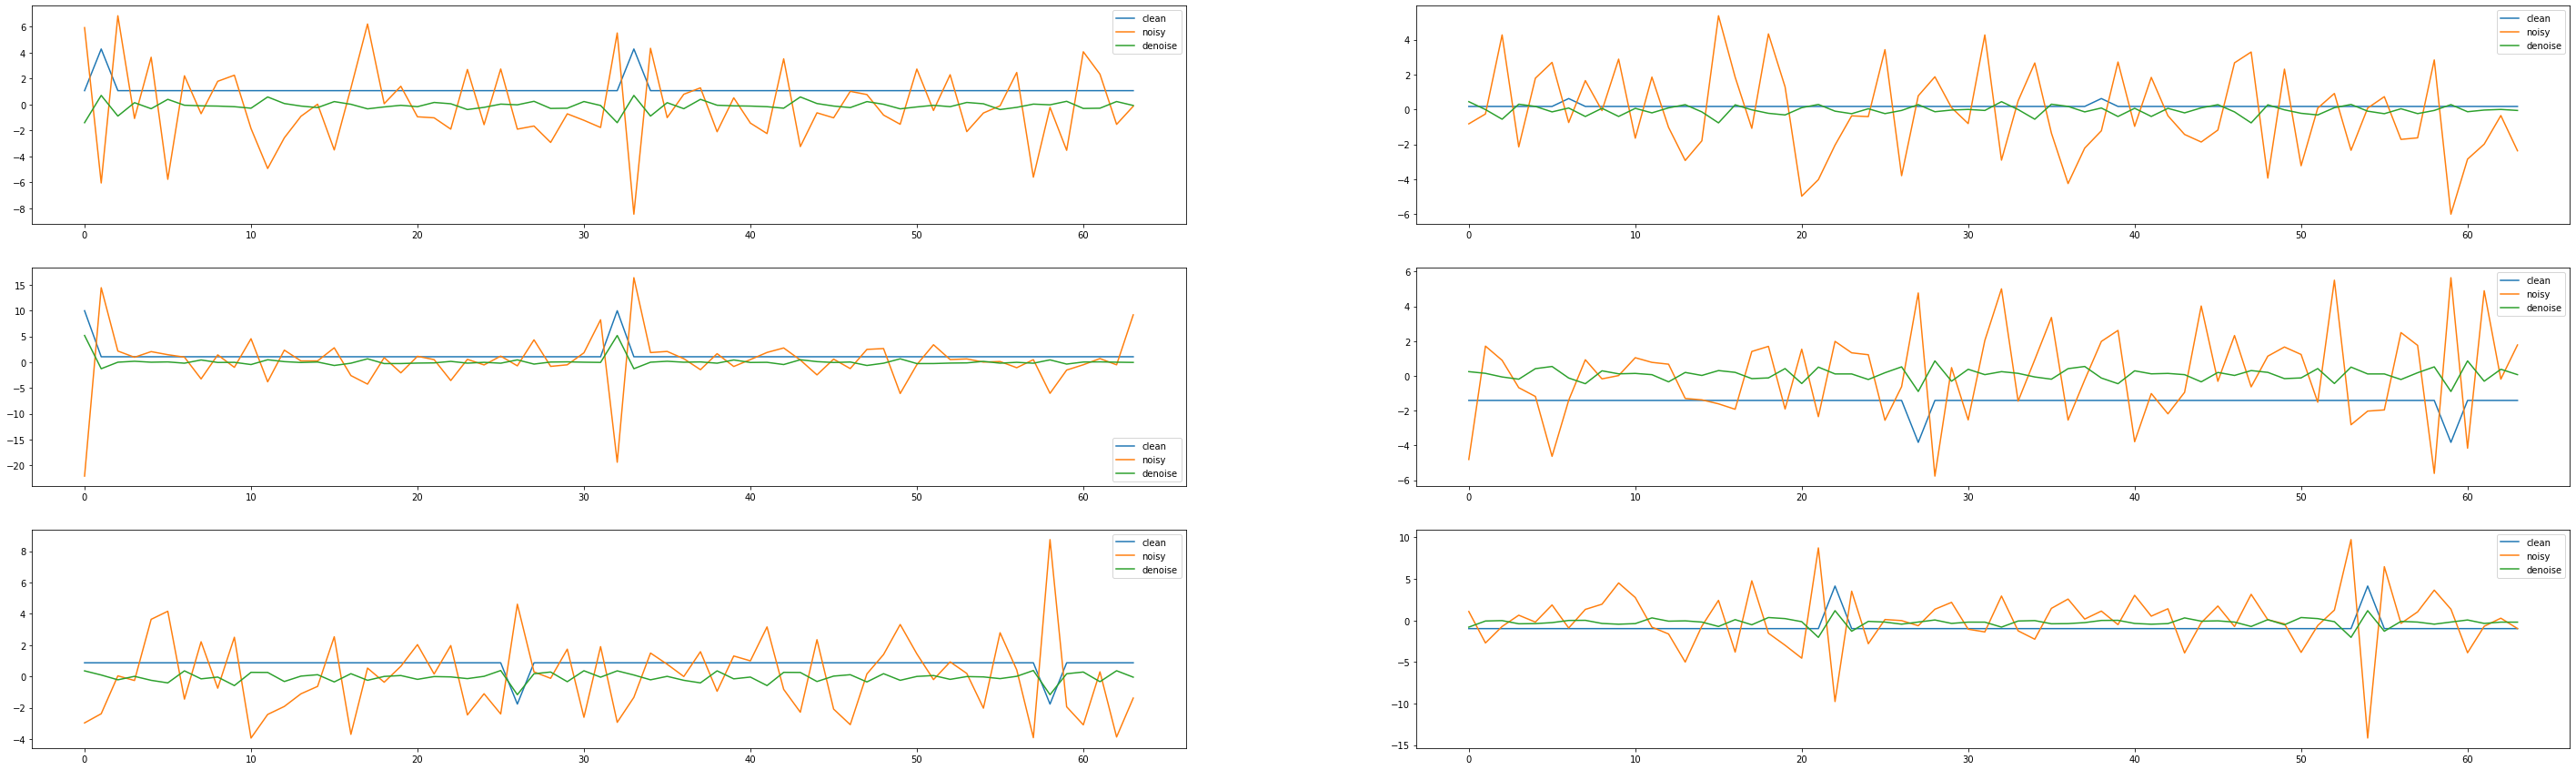

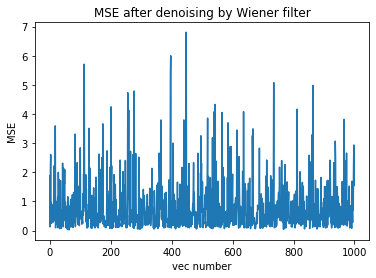

The avarage MSE is:  0.8107298503559822


In [32]:
# section d repeat c
experiment(sample_num, H, math.sqrt(5))

## e)

In [33]:
# creats the DFT matrix
def DFT_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * math.pi * 1J / N )
    W = np.power( omega, i * j ) / math.sqrt(N)
    return W
DFT_64 = DFT_matrix(N)
DFT_64_conj = np.conjugate(DFT_64)

In [34]:
# pseudo inverse for H
H_diag = np.diag(np.matmul(np.matmul(DFT_64,H),DFT_64_conj)).real
H_diag = H_diag.astype('float64')
H_diag[np.abs(H_diag)<=1e-10]=0 #against numerical error
eigen_val = lambda num : 1/H_diag[num] if H_diag[num]!=0 else 0 
H_dagger_diag_lst=[eigen_val(i) for i in range(H_diag.shape[0])]
H_dagger_diag = np.diag(np.array(H_dagger_diag_lst))
H_dagger = np.matmul(np.matmul(DFT_64_conj,H_dagger_diag),DFT_64).real

In [35]:
#H_dagger=np.linalg.pinv(H)
H_dagger_X_H = np.matmul(H_dagger, H)
H_X_H_dagger = np.matmul(H, H_dagger)


In [36]:
pd.DataFrame(H_dagger)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-5.261165,-4.835964,-4.364211,-3.903619,-3.458331,-3.028646,-2.614583,-2.216146,-1.833333,-1.466146,...,-1.114583,-1.466146,-1.833333,-2.216146,-2.614583,-3.028646,-3.458331,-3.903619,-4.364211,-4.835964
1,-4.835964,-5.261165,-4.835964,-4.364211,-3.903619,-3.458331,-3.028646,-2.614583,-2.216146,-1.833333,...,-0.778646,-1.114583,-1.466146,-1.833333,-2.216146,-2.614583,-3.028646,-3.458331,-3.903619,-4.364211
2,-4.364211,-4.835964,-5.261165,-4.835964,-4.364211,-3.903619,-3.458331,-3.028646,-2.614583,-2.216146,...,-0.458333,-0.778646,-1.114583,-1.466146,-1.833333,-2.216146,-2.614583,-3.028646,-3.458331,-3.903619
3,-3.903619,-4.364211,-4.835964,-5.261165,-4.835964,-4.364211,-3.903619,-3.458331,-3.028646,-2.614583,...,-0.153646,-0.458333,-0.778646,-1.114583,-1.466146,-1.833333,-2.216146,-2.614583,-3.028646,-3.458331
4,-3.458331,-3.903619,-4.364211,-4.835964,-5.261165,-4.835964,-4.364211,-3.903619,-3.458331,-3.028646,...,0.135417,-0.153646,-0.458333,-0.778646,-1.114583,-1.466146,-1.833333,-2.216146,-2.614583,-3.028646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-3.028646,-2.614583,-2.216146,-1.833333,-1.466146,-1.114583,-0.778646,-0.458333,-0.153646,0.135417,...,-3.028646,-3.458331,-3.903619,-4.364211,-4.835964,-5.261165,-4.835964,-4.364211,-3.903619,-3.458331
60,-3.458331,-3.028646,-2.614583,-2.216146,-1.833333,-1.466146,-1.114583,-0.778646,-0.458333,-0.153646,...,-2.614583,-3.028646,-3.458331,-3.903619,-4.364211,-4.835964,-5.261165,-4.835964,-4.364211,-3.903619
61,-3.903619,-3.458331,-3.028646,-2.614583,-2.216146,-1.833333,-1.466146,-1.114583,-0.778646,-0.458333,...,-2.216146,-2.614583,-3.028646,-3.458331,-3.903619,-4.364211,-4.835964,-5.261165,-4.835964,-4.364211
62,-4.364211,-3.903619,-3.458331,-3.028646,-2.614583,-2.216146,-1.833333,-1.466146,-1.114583,-0.778646,...,-1.833333,-2.216146,-2.614583,-3.028646,-3.458331,-3.903619,-4.364211,-4.835964,-5.261165,-4.835964


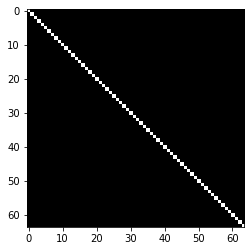

In [37]:
plt.imshow(H_dagger_X_H, cmap='gray')

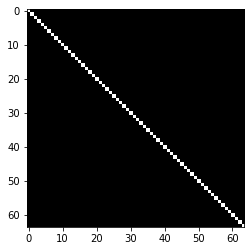

In [38]:
plt.imshow(H_X_H_dagger, cmap='gray')

In [39]:
phi1 = DFT_64_conj[:,0].real
phi2 = phi1*300

In [40]:
print(np.linalg.norm(phi1-phi2))

299.0


In [41]:
multi1 = np.matmul(H_dagger,phi1)
multi2 = np.matmul(H_dagger,phi2)

In [42]:
print(np.linalg.norm(multi1-multi2))

6.191935323441763e-10


In [43]:
pd.DataFrame(phi1)

,0
0,0.125
1,0.125
2,0.125
3,0.125
4,0.125
...,...
59,0.125
60,0.125
61,0.125
62,0.125


In [44]:
pd.DataFrame(phi2)

,0
0,37.5
1,37.5
2,37.5
3,37.5
4,37.5
...,...
59,37.5
60,37.5
61,37.5
62,37.5


In [45]:
pd.DataFrame(phi1-phi2)

,0
0,-37.375
1,-37.375
2,-37.375
3,-37.375
4,-37.375
...,...
59,-37.375
60,-37.375
61,-37.375
62,-37.375


In [46]:
# H_dagger X phi1
pd.DataFrame(multi1)

,0
0,-5.662137e-15
1,4.796163e-14
2,9.509060e-14
3,1.403322e-13
4,1.779132e-13
...,...
59,-2.402523e-13
60,-2.018941e-13
61,-1.632028e-13
62,-1.163514e-13


In [47]:
# H_dagger X phi2
pd.DataFrame(multi2)

,0
0,-2.785328e-12
1,1.401190e-11
2,2.899014e-11
3,4.186518e-11
4,5.324807e-11
...,...
59,-7.187850e-11
60,-6.002665e-11
61,-4.851586e-11
62,-3.498712e-11


In [55]:
# H_dagger X phi1 -  H_dagger X phi2
pd.DataFrame(multi1-multi2)

,0
0,2.779665e-12
1,-1.396394e-11
2,-2.889505e-11
3,-4.172485e-11
4,-5.307016e-11
...,...
59,7.163825e-11
60,5.982476e-11
61,4.835266e-11
62,3.487077e-11
